<img src="https://user-images.githubusercontent.com/26833433/98702494-b71c4e80-237a-11eb-87ed-17fcd6b3f066.jpg">

This notebook was written by Ultralytics LLC, and is freely available for redistribution under the [GPL-3.0 license](https://choosealicense.com/licenses/gpl-3.0/). 
For more information please visit https://github.com/ultralytics/yolov5 and https://www.ultralytics.com.

# Setup

Clone repo, install dependencies and check PyTorch and GPU.

In [1]:
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
%pip install -qr requirements.txt  # install dependencies

import torch
from IPython.display import Image, clear_output  # to display images

clear_output()
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

Setup complete. Using torch 1.8.0+cu101 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15109MB, multi_processor_count=40)


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
print(os.listdir())
os.chdir("../")
!unzip -q drive/MyDrive/train_data.zip -d /content/
%mv train_data yolov5
os.chdir("yolov5")

['.git', 'tutorial.ipynb', 'test.py', 'models', 'hubconf.py', '.dockerignore', 'README.md', 'Dockerfile', 'utils', 'train.py', 'data', '.gitattributes', 'detect.py', 'requirements.txt', '.github', '.gitignore', 'LICENSE', 'weights']


In [ ]:
# Tensorboard (optional)
%load_ext tensorboard
%tensorboard --logdir runs/train

In [ ]:
# Weights & Biases (optional)
%pip install -q wandb  
!wandb login  # use 'wandb disabled' or 'wandb enabled' to disable or enable

In [5]:
# Train YOLOv5s on rapsodo's baseball dataset for 50 epochs
!python train.py --img 640 --batch 16 --epochs 50 --data baseball.yaml --weights yolov5s.pt --nosave --cache

github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v4.0-138-ged2c742 torch 1.8.0+cu101 CUDA:0 (Tesla T4, 15109.75MB)

Namespace(adam=False, batch_size=16, bucket='', cache_images=True, cfg='', data='baseball.yaml', device='', entity=None, epochs=50, evolve=False, exist_ok=False, global_rank=-1, hyp='data/hyp.scratch.yaml', image_weights=False, img_size=[640, 640], linear_lr=False, local_rank=-1, log_artifacts=False, log_imgs=16, multi_scale=False, name='exp', noautoanchor=False, nosave=True, notest=False, project='runs/train', quad=False, rect=False, resume=False, save_dir='runs/train/exp2', single_cls=False, sync_bn=False, total_batch_size=16, weights='yolov5s.pt', workers=8, world_size=1)
wandb: Install Weights & Biases for YOLOv5 logging with 'pip install wandb' (recommended)
Start Tensorboard with "tensorboard --logdir runs/train", view at http://localhost:6006/
2021-03-19 18:46:24.625475: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Success

In [26]:
!python detect.py --weights runs/train/exp2/weights/last.pt --img 640 --conf 0.25 --source train_data/images/train/1.jpeg

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.25, device='', exist_ok=False, img_size=640, iou_thres=0.45, name='exp', project='runs/detect', save_conf=False, save_txt=False, source='train_data/images/train/1.jpeg', update=False, view_img=False, weights=['runs/train/exp2/weights/last.pt'])
YOLOv5 🚀 v4.0-138-ged2c742 torch 1.8.0+cu101 CUDA:0 (Tesla T4, 15109.75MB)

Fusing layers... 
Model Summary: 224 layers, 7053910 parameters, 0 gradients, 16.3 GFLOPS
image 1/1 /content/yolov5/train_data/images/train/1.jpeg: 640x512 1 ball, Done. (0.011s)
Results saved to runs/detect/exp6
Done. (0.045s)


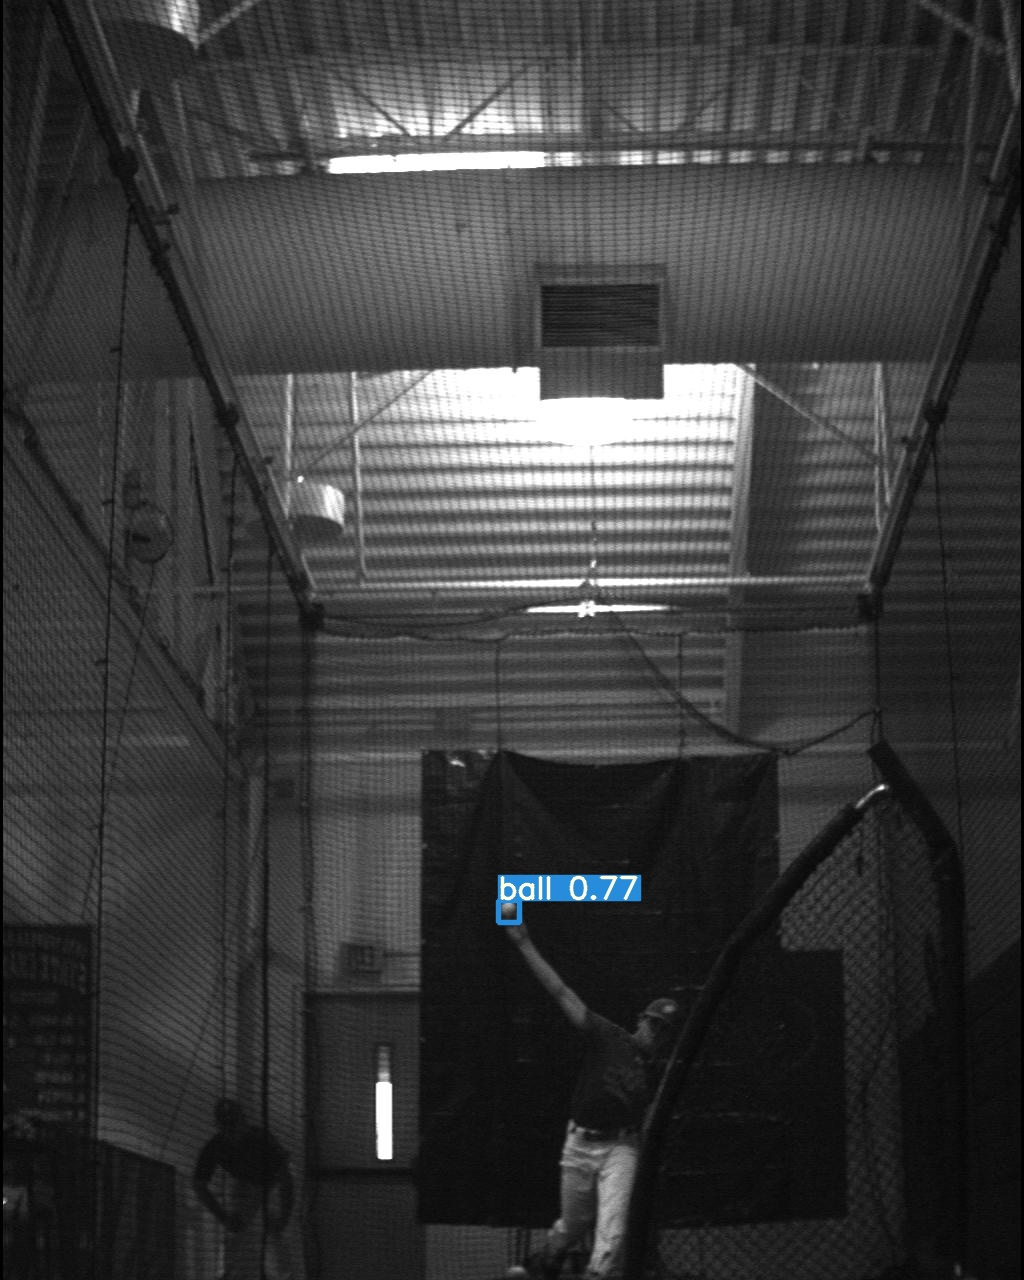

In [27]:
Image(filename='runs/detect/exp6/1.jpeg', width=800)  

In [18]:
!python detect.py --weights runs/train/exp2/weights/last.pt --img 640 --conf 0.25 --source train_data/images/val/2.jpeg

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.25, device='', exist_ok=False, img_size=640, iou_thres=0.45, name='exp', project='runs/detect', save_conf=False, save_txt=False, source='train_data/images/val/2.jpeg', update=False, view_img=False, weights=['runs/train/exp2/weights/last.pt'])
YOLOv5 🚀 v4.0-138-ged2c742 torch 1.8.0+cu101 CUDA:0 (Tesla T4, 15109.75MB)

Fusing layers... 
Model Summary: 224 layers, 7053910 parameters, 0 gradients, 16.3 GFLOPS
image 1/1 /content/yolov5/train_data/images/val/2.jpeg: 640x512 1 ball, Done. (0.011s)
Results saved to runs/detect/exp5
Done. (0.038s)


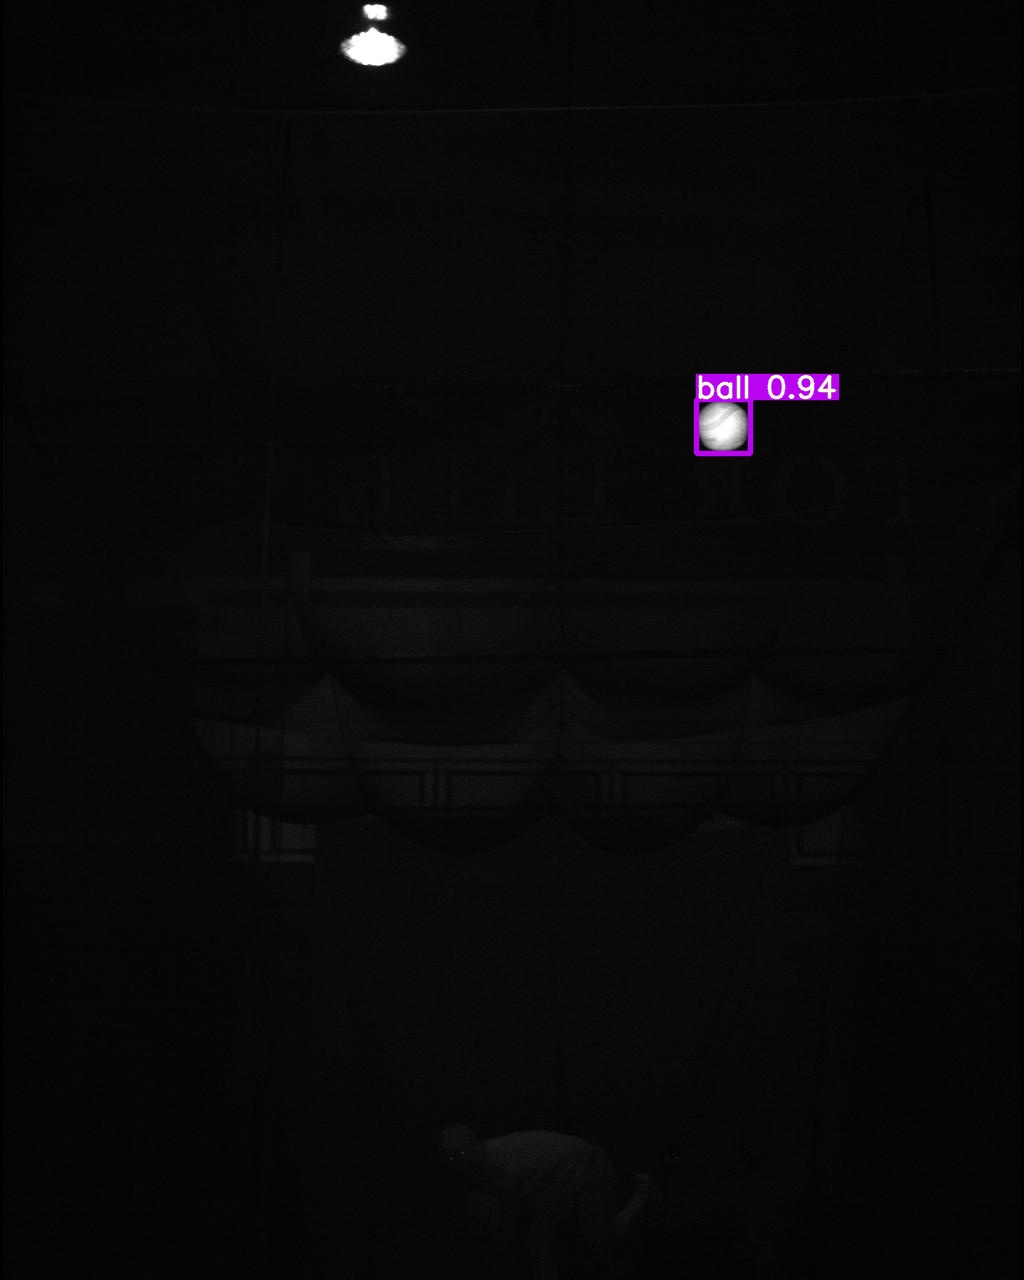

In [19]:
Image(filename='runs/detect/exp5/2.jpeg', width=800)  

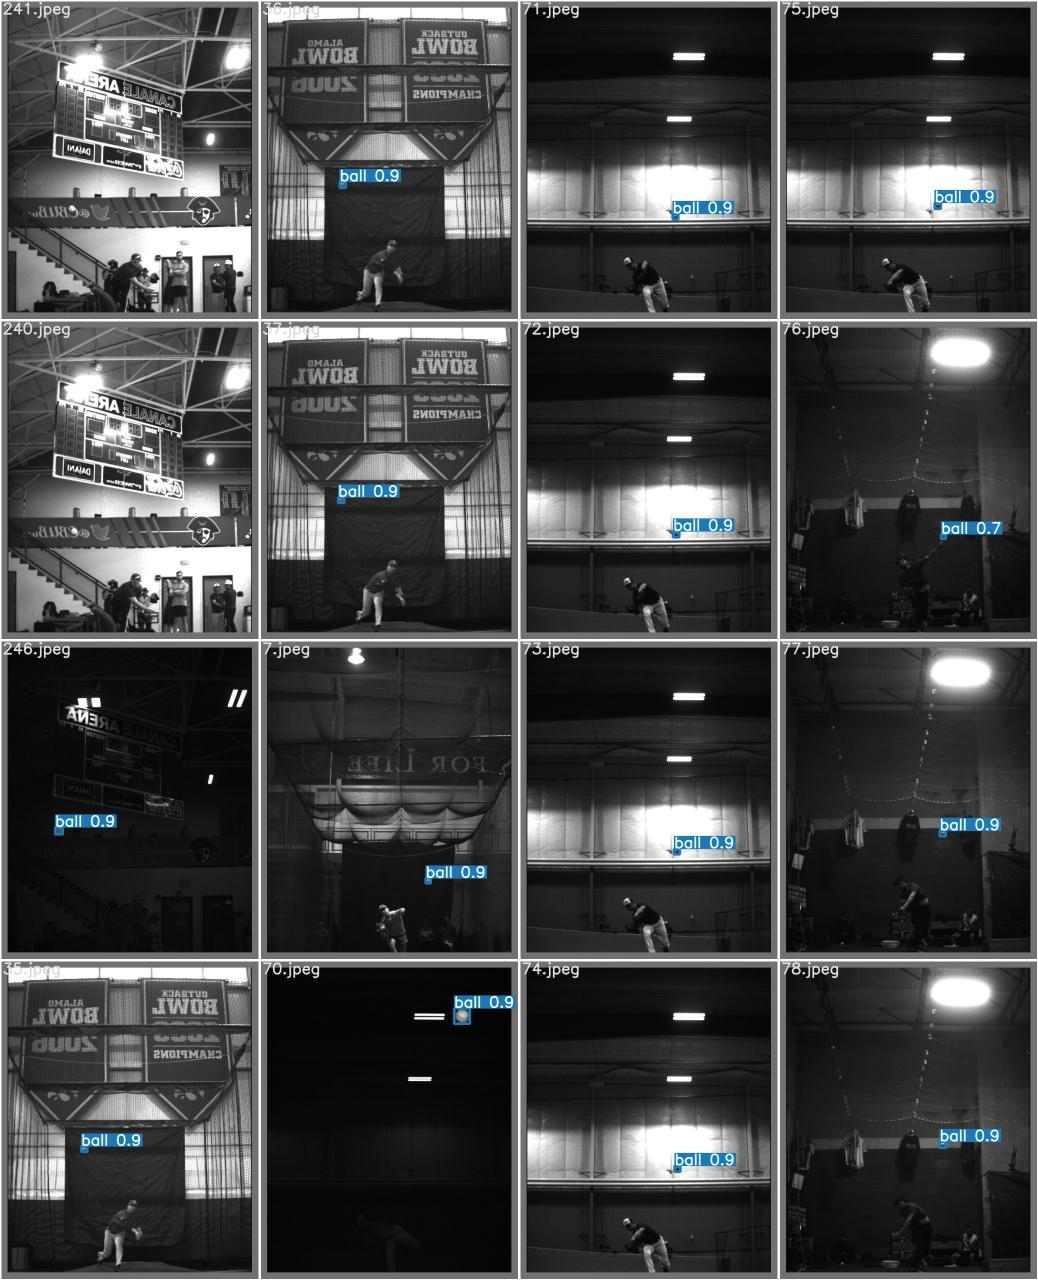

In [20]:
Image(filename='runs/train/exp2/train_batch2.jpg', width=800)  # train batch 0 mosaics and labels
Image(filename='runs/train/exp2/test_batch2_labels.jpg', width=800)  # test batch 0 labels
Image(filename='runs/train/exp2/test_batch2_pred.jpg', width=800)  # test batch 0 predictions

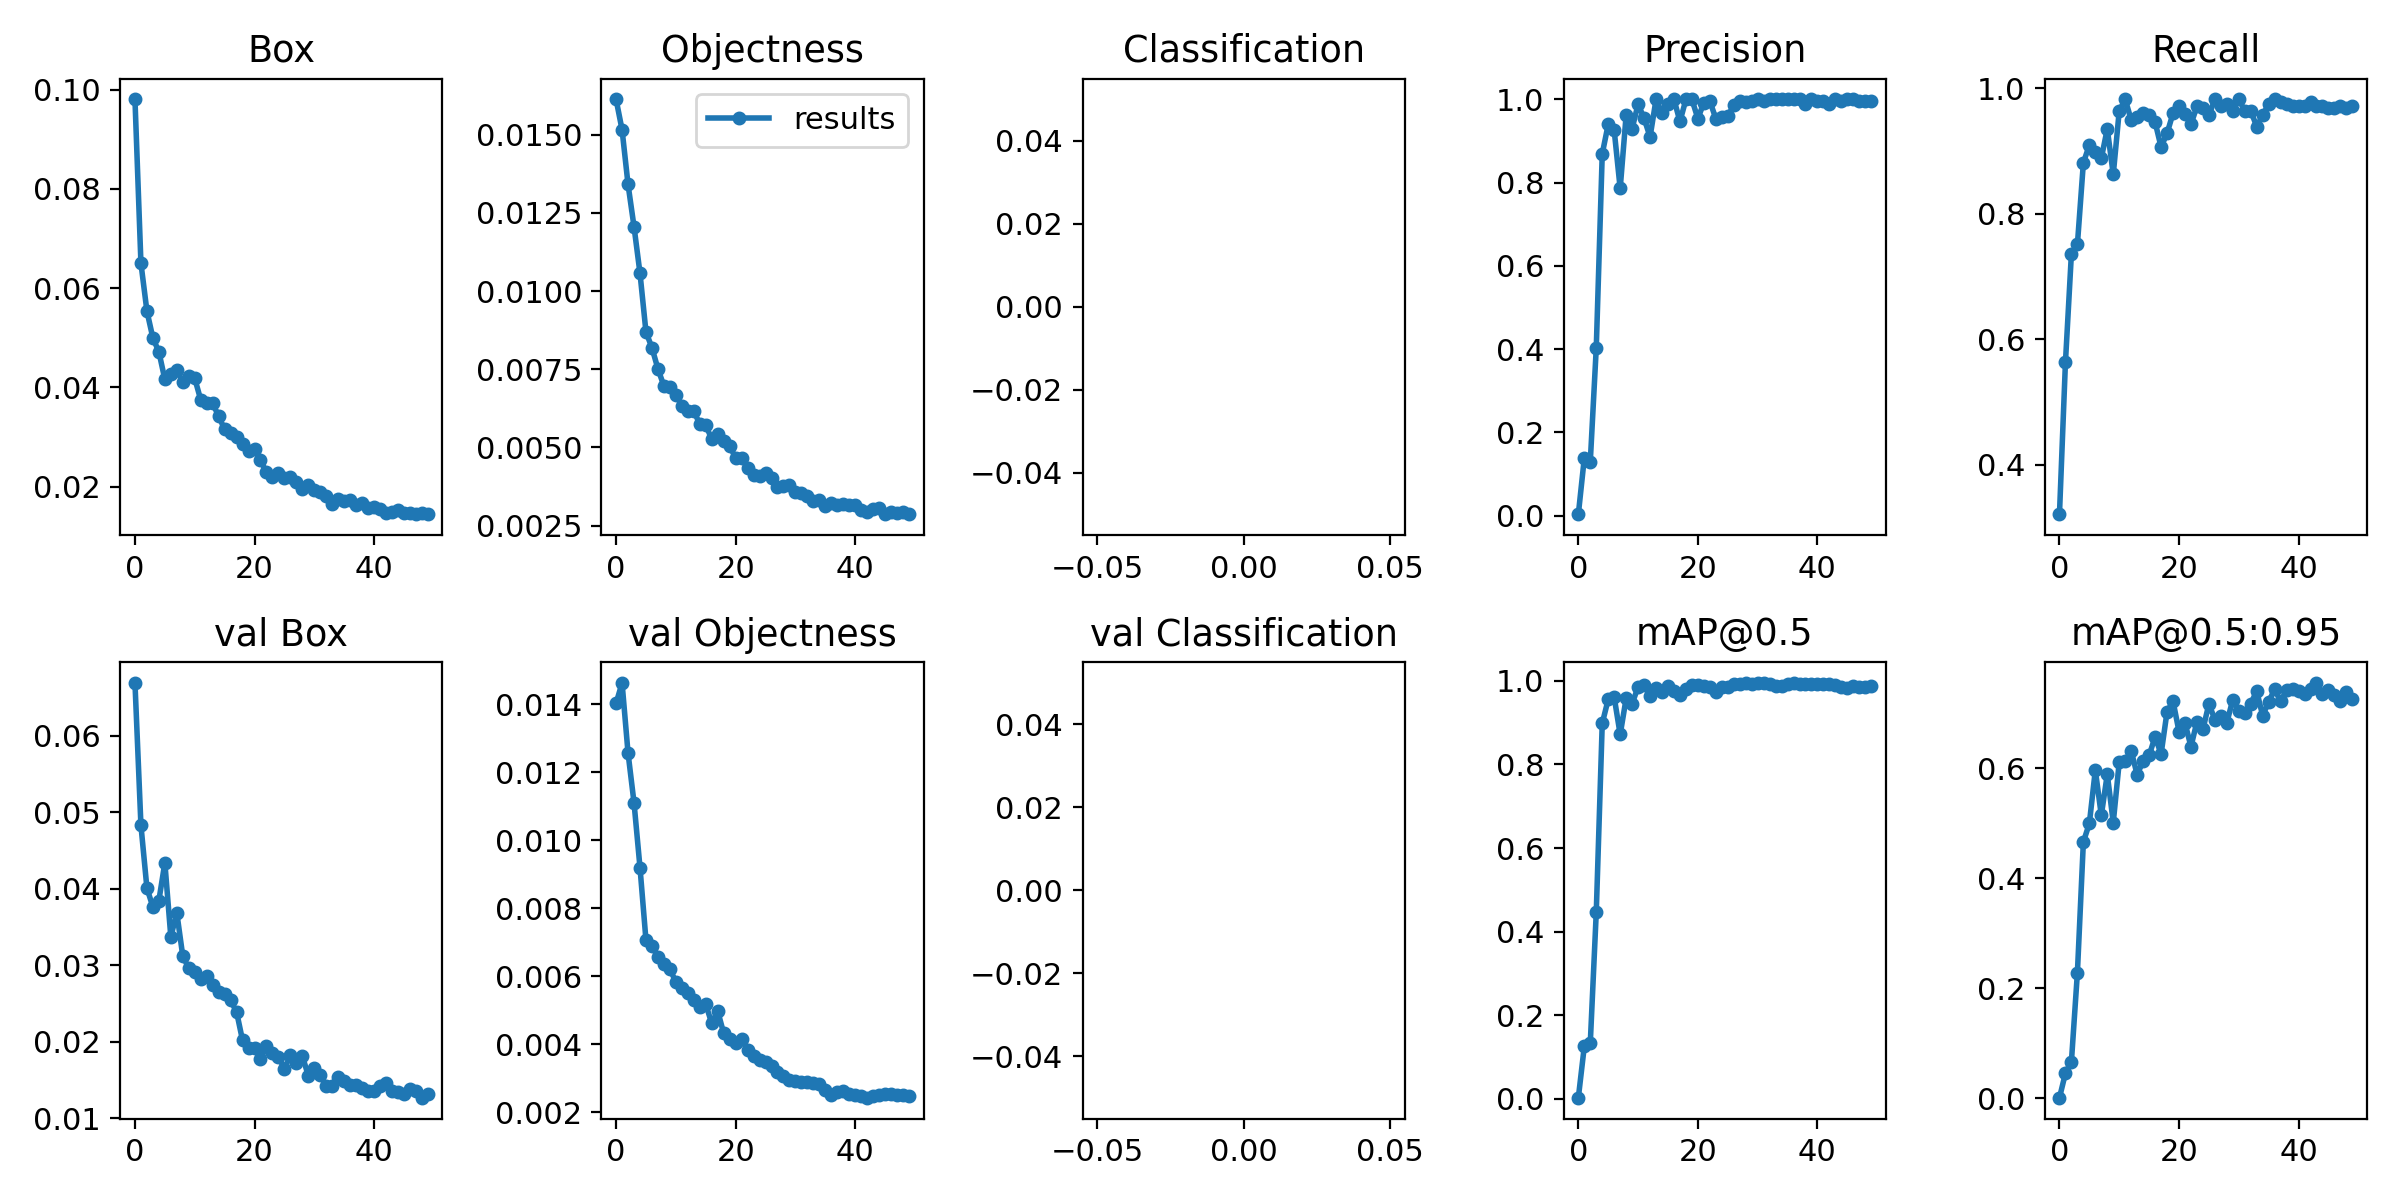

In [21]:
from utils.plots import plot_results 
plot_results(save_dir='runs/train/exp2')
Image(filename='runs/train/exp2/results.png', width=800)

In [22]:
import torch
import PIL
import random

# Model
model = torch.hub.load('ultralytics/yolov5', 'custom', path_or_model='runs/train/exp2/weights/last.pt')  # custom model

# Images
number = 277
dir = 'train_data/images/val/'
imgs = []
for i in range(50):
  rand = random.randint(1, 277)
  string = dir + f"{rand}.jpeg"
  imgs.append(string)


# Inference
results = model(imgs)
results.save()  # or .show(), .save()

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to /root/.cache/torch/hub/master.zip

                 from  n    params  module                                  arguments                     
  0                -1  1      3520  models.common.Focus                     [3, 32, 3]                    
  1                -1  1     18560  models.common.Conv                      [32, 64, 3, 2]                
  2                -1  1     18816  models.common.C3                        [64, 64, 1]                   
  3                -1  1     73984  models.common.Conv                      [64, 128, 3, 2]               
  4                -1  1    156928  models.common.C3                        [128, 128, 3]                 
  5                -1  1    295424  models.common.Conv                      [128, 256, 3, 2]              
  6                -1  1    625152  models.common.C3                        [256, 256, 3]                 
  7                -1  1   1180672

Adding autoShape... 
Saving results/219.jpg, results/255.jpg, results/94.jpg, results/17.jpg, results/172.jpg, results/151.jpg, results/229.jpg, results/45.jpg, results/10.jpg, results/37.jpg, results/173.jpg, results/41.jpg, results/236.jpg, results/264.jpg, results/166.jpg, results/239.jpg, results/258.jpg, results/244.jpg, results/256.jpg, results/3.jpg, results/96.jpg, results/231.jpg, results/133.jpg, results/260.jpg, results/21.jpg, results/231.jpg, results/216.jpg, results/222.jpg, results/246.jpg, results/102.jpg, results/31.jpg, results/108.jpg, results/189.jpg, results/201.jpg, results/201.jpg, results/195.jpg, results/199.jpg, results/31.jpg, results/255.jpg, results/213.jpg, results/211.jpg, results/265.jpg, results/125.jpg, results/45.jpg, results/3.jpg, results/162.jpg, results/55.jpg, results/11.jpg, results/18.jpg, results/240.jpg, done.


Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['rand', 'random', 'number']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


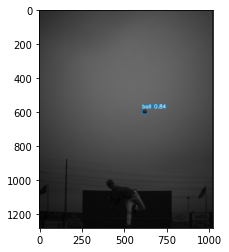

In [23]:
%pylab inline
import matplotlib.image as mpimg
img = mpimg.imread('results/219.jpg')
imgplot = plt.imshow(img)
plt.show()

In [24]:
import shutil
shutil.make_archive('results', 'zip', 'results')

'/content/yolov5/results.zip'

In [25]:
!python models/export.py --weights runs/train/exp/weights/last.pt --img 640 --batch 1  # export at 640x640 with batch size 1

Namespace(batch_size=1, device='cpu', dynamic=False, grid=False, img_size=[640, 640], weights='runs/train/exp/weights/last.pt')
YOLOv5 🚀 v4.0-138-ged2c742 torch 1.8.0+cu101 CPU

Fusing layers... 
Model Summary: 224 layers, 7053910 parameters, 0 gradients, 16.3 GFLOPS

Starting TorchScript export with torch 1.8.0+cu101...
/usr/local/lib/python3.7/dist-packages/torch/jit/_trace.py:940: TracerWarning: Encountering a list at the output of the tracer might cause the trace to be incorrect, this is only valid if the container structure does not change based on the module's inputs. Consider using a constant container instead (e.g. for `list`, use a `tuple` instead. for `dict`, use a `NamedTuple` instead). If you absolutely need this and know the side effects, pass strict=False to trace() to allow this behavior.
  _force_outplace,
TorchScript export success, saved as runs/train/exp/weights/last.torchscript.pt

Starting ONNX export with onnx 1.8.1...
ONNX export success, saved as runs/train/exp/